In [3]:
%qtconsole # run this cell if you want an interactive console

In [2]:
# Notebook setup, imports
import example_network as ex
%autoreload 2
%matplotlib inline

In [8]:
ffInputType = 'E and I'

multEI = (92.0, 102.0)  # Uncomment this for FF input to E and I cells
#multEI = (28.0, 0.0)   # Uncomment this for FF input to E cells only 

outNT = ex.run_sim(ffExcInputMult=multEI[0], ffInhInputMult=multEI[1])

brian.stateupdater: WARNING  Using codegen CStateUpdater


n cells: 10000, nE,I 8000,2000, Clock(dt=50.0 * usecond, t=0.0 * second), absRefractoryMs: 3
Adding conductance for 2000 cells (can be slow):  done
Network construction time: 84.4 seconds
Simulation running...
28% complete, 30s elapsed, approximately 1m 15s remaining.
56% complete, 1m 0s elapsed, approximately 46s remaining.
85% complete, 1m 30s elapsed, approximately 15s remaining.
100% complete, 1m 46s elapsed, approximately 0s remaining.
Simulation time: 107.4 seconds


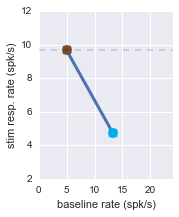

In [9]:
import seaborn as sns
a_ = np.asarray

histWinMsL = [ 300.0+x*1000+a_((100,900)) for x in [0,1,2,3] ]
histEdgesS = np.hstack(histWinMsL)/1000.0
rateM = ex.hist_spikes(outNT.spiketimes, histEdgesS)
meanRateV = np.mean(rateM[0:8000,:],axis=0)

figH = plt.figure(figsize=(2.4,3.0))
axH = plt.gca()
baseRates = meanRateV[[0,4]]  # odd-numbered hist bins are discarded: small start/end segments
evokedRates = meanRateV[[2,6]] - baseRates
plt.plot(baseRates, evokedRates, 'x-', lw=3.0)
plt.plot(baseRates[0], evokedRates[0], '.', color='#754C29', ms=20)
plt.plot(baseRates[1], evokedRates[1], '.', color='#00AEEF', ms=20)
plt.plot([0,50], a_((1,1))*evokedRates[0], 'k--', lw=0.25)
axH.set_ylim((2,12))

axH.set_ylabel('stim resp. rate (spk/s)')
axH.tick_params(direction='outward', top='off', right='off')
for tA in [axH.title, axH.xaxis.label, axH.yaxis.label]:
       tA.set_fontsize(11)
for tA in axH.get_xticklabels()+axH.get_yticklabels():
        tA.set_fontsize(10)
axH.set_xticks(np.r_[0:30:5])
axH.set_xlim((0,24))
axH.set_xlabel('baseline rate (spk/s)')
